In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I somehow hate matplotlibs dark mode (I run a darkmode notebook), so I set it default
# dec 2022
plt.style.use('default') 

In [3]:
# This is the data from kaggle that we downloaded, and we put it in the same folder as this notebook
# It's a csv file, so we can use pandas to read it with read_csv. 
df = pd.read_csv('NetflixOriginals.csv')

In [4]:
# Always good to have a sanity check, so we can see the first 5 rows of the data
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## What are some questions we want to ask?

One of the first things when doing EDA is to consider questions that you would like to know the answer to from the data.
For example in this case, we might want to know:

1. What are the most popular genres?
2. What are the most popular movies?
3. Is there any relationship between the number of movies and the year?
4. Is there any variable that seems to correlate with the rating of a movie?


You should write a big list of questions! whatever comes to mind just looking at the first 5 rows.
Then you can start to think about how you might answer those questions.



In [5]:
# Let's try to understand the first question.
# What are the most popular genres?
# We can see that the genres are in a column called 'Genre'
# We can use the value_counts() function to count the number of times each genre appears

df['Genre'].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Action-adventure                          1
Animation / Science Fiction               1
Anthology/Dark comedy                     1
Musical / Short                           1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [6]:
# The above output isn't a bit too long to read.
# But I'm noticing that some genres are repeated, but with different capitalization, this may be something I can clean later
# For the time being, I want to see if I can find a list of all the genres that have more than 1 occurence

# We can use a boolean mask to do this
# A boolean mask is a list of True/False values that we can use to filter our data

mask = df['Genre'].value_counts() > 1 # this will return a mask of True/False values
df['Genre'].value_counts()[mask] # this will return the value counts of the genres that have more than 1 occurence

# After this prints out you may decide you need to change the number of occurences.

Genre
Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Horror                        9
Biopic                        9
Action                        7
Aftershow / Interview         6
Concert Film                  6
Romance                       6
Action comedy                 5
Romantic drama                5
Animation                     5
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Psychological thriller        4
Animation / Short             4
One-man show                  3
Sports-drama                  3
Action-thriller               3
Science fiction/Drama         3
Horror thriller               3
Western                       3
Dark comedy                   2
Mystery                       2
Family film                   2
Black comedy                  2
Co

<Axes: title={'center': 'Most Popular Genres'}, xlabel='Genre', ylabel='Number of Occurences'>

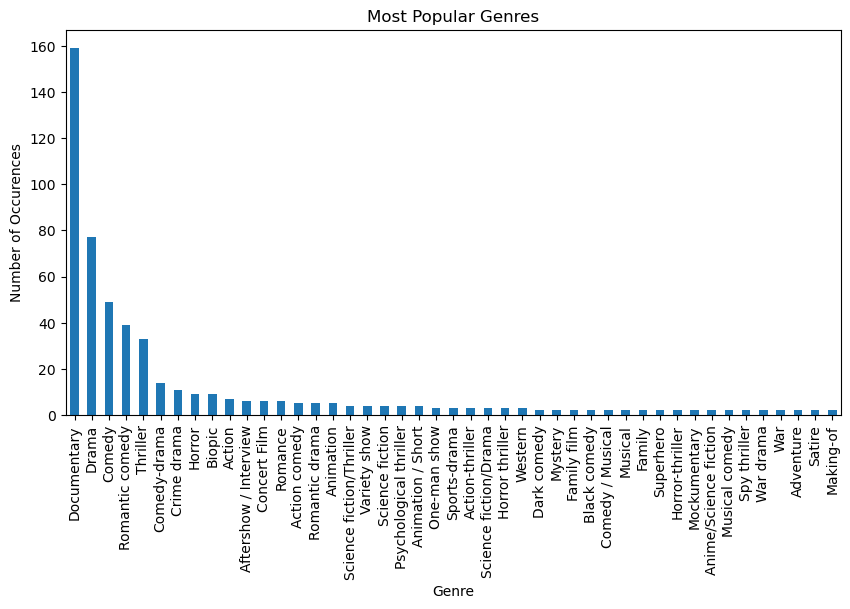

In [7]:
# Now that we have a list of genres that have more than 1 occurence, we can plot them
# We can use the plot() function to plot the value counts of the genres that have more than 1 occurence
# We can also use the kind parameter to specify the type of plot we want
# We can use the figsize parameter to specify the size of the plot
# We can use the title parameter to specify the title of the plot
# We can use the xlabel parameter to specify the x axis label of the plot
# We can use the ylabel parameter to specify the y axis label of the plot

df['Genre'].value_counts()[mask].plot(kind='bar', figsize=(10, 5), title='Most Popular Genres', xlabel='Genre', ylabel='Number of Occurences')

But wait, this tells me which genre repeated the most, not which one had a high IMDB rating. Let's try to find the highest rated genre.

In [8]:
# We need to group the data by genre and then find the mean of the IMDB Score
# First we need to group the data by genre, this makes "groups" of data for each genre
# Then we need to find the mean of the IMDB Score for each group
# Then we need to sort the data by the mean of the IMDB Score
# We want to sort the data in descending order, so we need to set the ascending parameter to False
# Then we need to get the first 10 rows of the data
df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).head(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Name: IMDB Score, dtype: float64

 Now you try finding the movie languages with the highest IMDB Score, you can use the same pattern as above.

In [9]:
df.groupby('Language')['IMDB Score'].mean().sort_values(ascending=False)

Language
English/Ukranian/Russian      8.400000
English/Akan                  7.700000
English/Hindi                 7.300000
English/Arabic                7.300000
English/Korean                7.300000
English/Russian               7.300000
Spanish/English               7.300000
Khmer/English/French          7.200000
Tamil                         7.200000
Bengali                       7.100000
English/Mandarin              7.050000
Georgian                      6.800000
Thia/English                  6.700000
English/Taiwanese/Mandarin    6.500000
English/Swedish               6.500000
Spanish/Catalan               6.400000
Japanese                      6.400000
English                       6.380050
Spanish                       6.303226
English/Spanish               6.220000
Portuguese                    6.216667
Marathi                       6.066667
Hindi                         5.981818
Korean                        5.916667
Indonesian                    5.844444
Dutch           

<Axes: title={'center': 'Movie languages with the highest IMDB Score'}, xlabel='Language', ylabel='IMDB Score'>

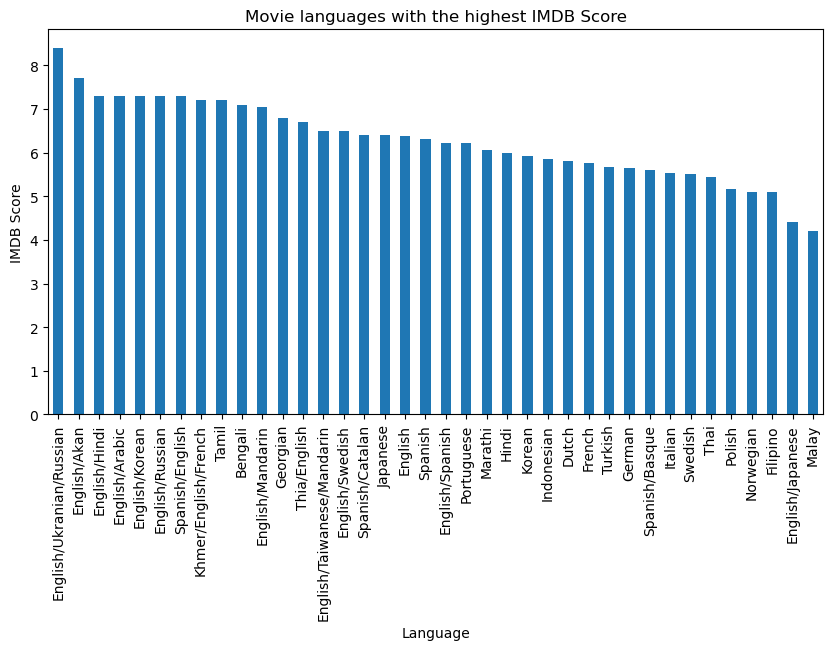

In [10]:
df.groupby('Language')['IMDB Score'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Movie languages with the highest IMDB Score', xlabel='Language', ylabel='IMDB Score')

In [11]:
# Sort all movies by IMDB Score (descending)
most_popular_movies = df.sort_values(by='IMDB Score', ascending=False).head(15)

most_popular_movies


,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English


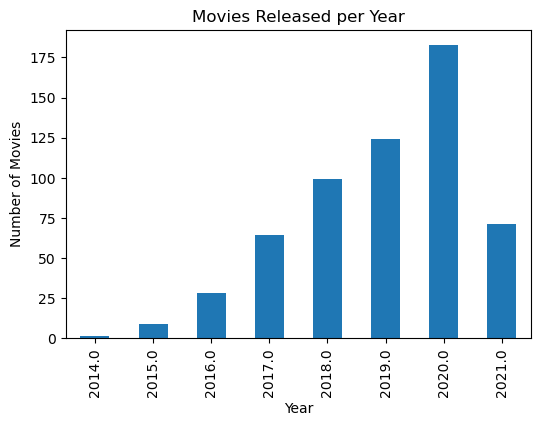

In [12]:
#3. Is there any relationship between the number of movies and the year?
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

# Extract year
df['Year'] = df['Premiere'].dt.year

# Count movies per year
movies_per_year = df['Year'].value_counts().sort_index()

# Plot
movies_per_year.plot(kind='bar', figsize=(6,4))
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released per Year")
plt.show()

In [13]:
#4. Is there any variable that seems to correlate with the rating of a movie?
numeric_df = df[['Runtime', 'Year', 'IMDB Score']]
corr = numeric_df.corr()
corr

,Runtime,Year,IMDB Score
Runtime,1.000000,0.068354,-0.040896
Year,0.068354,1.000000,-0.134122
IMDB Score,-0.040896,-0.134122,1.000000


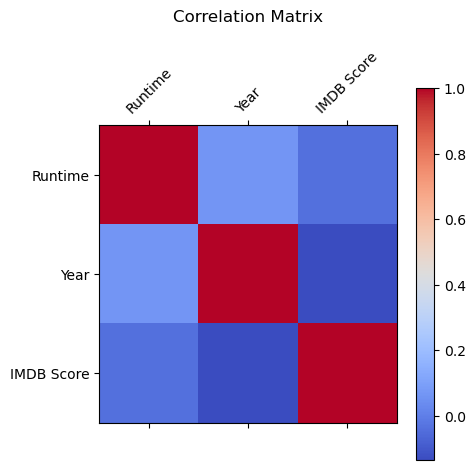

In [14]:
plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()

# It's your turn now.

Now we want you to go ahead and try to answer your own questions. A few big things are going to happen.

1. You will get stuck
2. You won't know what to do
3. You will get frustrated

This is all normal! This is how everyone learns to program and do data science. Just like chess has nearly infinite branching factors, learning to do data science has a similar branching factor. We cannot teach you every branch, you will encounter many things you have not been shown how to do. That's ok! Our hope is that you will learn how to learn, and that you will learn how to find the answers to your questions.

More importantly, we are here for you on discord, waiting to answer your questions. Please ask us questions! We are here to help you learn.

Some last tips of advice.

1. You can start by just adjusting existing code patterns you have already seen.
2. When you have a big question, try to break it into small tasks. For example if my question is "3. Is there any relationship between the number of movies and the year?" Then I will want to break that into smaller tasks. I might start with "How do I get the number of movies per year?" and then "How do I plot the number of movies per year?" and then "How do I plot the number of movies per year in a way that I can see the relationship between the number of movies and the year?" Keep breaking things into smaller tasks and doing them. Then put it all together.

Good luck! We are here to help you!


In [15]:
# Average IMDB Score per Language + Genre
avg_scores = df.groupby(['Language', 'Genre'])['IMDB Score'].mean().reset_index()

# Pick the Genre with the max score for each Language
most_popular_score = avg_scores.loc[avg_scores.groupby('Language')['IMDB Score'].idxmax()]

most_popular_score

,Language,Genre,IMDB Score
0,Bengali,Documentary,7.100000
1,Dutch,Crime drama,7.100000
20,English,Animation/Christmas/Comedy/Adventure,8.200000
105,English/Akan,War drama,7.700000
106,English/Arabic,Documentary,7.300000
107,English/Hindi,Documentary,7.300000
108,English/Japanese,Crime drama,6.300000
110,English/Korean,Action-adventure,7.300000
111,English/Mandarin,Documentary,7.050000
112,English/Russian,Documentary,7.300000


In [16]:
# Count movies per Language + Genre
counts = df.groupby(['Language', 'Genre']).size().reset_index(name='Count')

# Pick the most frequent Genre for each Language
most_popular_count = counts.loc[counts.groupby('Language')['Count'].idxmax()]

most_popular_count


,Language,Genre,Count
0,Bengali,Documentary,1
1,Dutch,Crime drama,1
44,English,Documentary,120
105,English/Akan,War drama,1
106,English/Arabic,Documentary,1
107,English/Hindi,Documentary,2
108,English/Japanese,Crime drama,1
110,English/Korean,Action-adventure,1
111,English/Mandarin,Documentary,2
112,English/Russian,Documentary,1


In [17]:
# Pick the row (movie) with the highest IMDB Score for each Language
most_popular_movies = df.loc[df.groupby('Language')['IMDB Score'].idxmax()]

most_popular_movies


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
473,Rooting for Roona,Documentary,2020-10-15,41,7.1,Bengali,2020.0
461,Ferry,Crime drama,2021-05-14,106,7.1,Dutch,2021.0
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020.0
553,Beasts of No Nation,War drama,2015-10-16,136,7.7,English/Akan,2015.0
512,Secrets of the Saqqara Tomb,Documentary,2020-10-28,114,7.3,English/Arabic,2020.0
524,Period. End of Sentence.,Documentary,2019-02-12,26,7.4,English/Hindi,2019.0
287,The Outsider,Crime drama,2018-03-09,120,6.3,English/Japanese,2018.0
507,Okja,Action-adventure,2017-06-28,121,7.3,English/Korean,2017.0
514,Sky Ladder: The Art of Cai Guo-Qiang,Documentary,2016-10-14,79,7.3,English/Mandarin,2016.0
515,Team Foxcatcher,Documentary,2016-04-29,90,7.3,English/Russian,2016.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    579 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Year        579 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.1+ KB


In [19]:
df.describe(include="all")

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
count,584,584,579,584.000000,584.000000,584,579.000000
unique,584,115,NaN,NaN,NaN,38,NaN
top,Enter the Anime,Documentary,NaN,NaN,NaN,English,NaN
freq,1,159,NaN,NaN,NaN,401,NaN
mean,NaN,NaN,2019-06-25 13:50:40.414507776,93.577055,6.271747,NaN,2018.953368
min,NaN,NaN,2014-12-13 00:00:00,4.000000,2.500000,NaN,2014.000000
25%,NaN,NaN,2018-07-02 12:00:00,86.000000,5.700000,NaN,2018.000000
50%,NaN,NaN,2019-10-18 00:00:00,97.000000,6.350000,NaN,2019.000000
75%,NaN,NaN,2020-09-25 12:00:00,108.000000,7.000000,NaN,2020.000000
max,NaN,NaN,2021-05-27 00:00:00,209.000000,9.000000,NaN,2021.000000


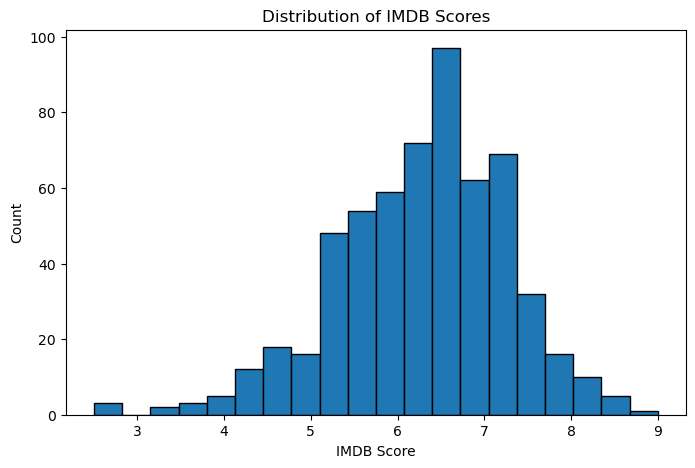

In [20]:
# IMDB Score distribution
plt.figure(figsize=(8,5))
plt.hist(df["IMDB Score"].dropna(), bins=20, edgecolor="black")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.title("Distribution of IMDB Scores")
plt.show()

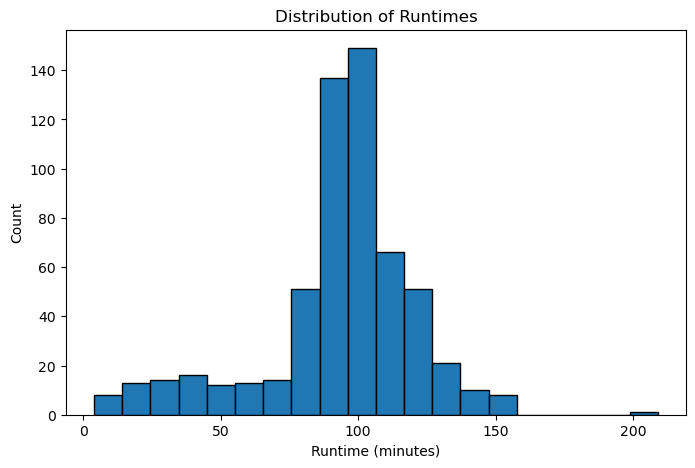

In [22]:
# Runtime distribution
plt.figure(figsize=(8,5))
plt.hist(df["Runtime"].dropna(), bins=20, edgecolor="black")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Runtimes")
plt.show()

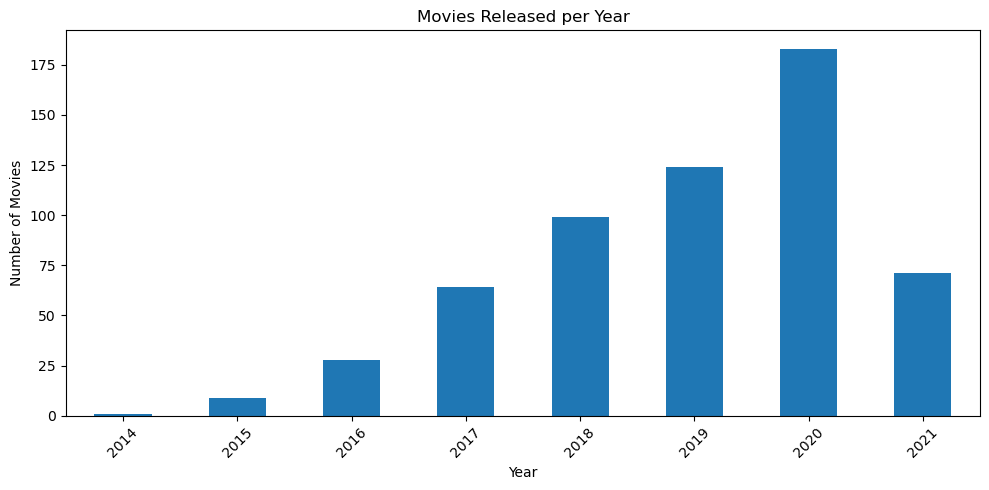

In [31]:
prem = df['Premiere']  # keep original

# 1. Try datetime parsing
parsed_years = pd.to_datetime(prem, errors='coerce').dt.year

# 2. For entries that failed, regex extract year
regex_years = prem.astype(str).str.extract(r'(\d{4})')[0].astype(float)

# 3. Combine: use parsed_years when available, otherwise regex_years
years = parsed_years.fillna(regex_years).dropna().astype(int)

# 4. Count and plot
counts = years.value_counts().sort_index()

plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

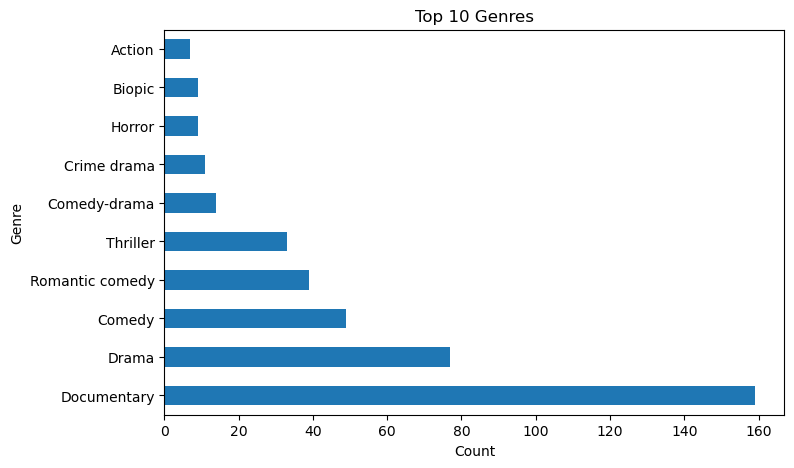

In [29]:
# Top 10 Genres
df["Genre"].value_counts().head(10).plot(kind="barh", figsize=(8,5))
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Genres")
plt.show()

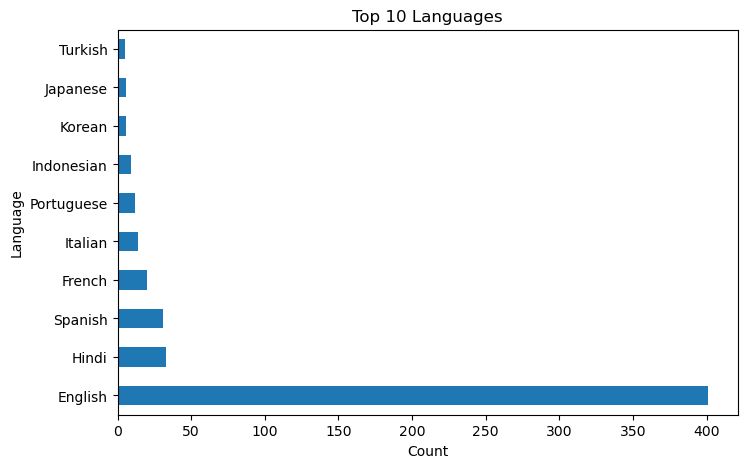

In [33]:
# Top 10 Languages
df["Language"].value_counts().head(10).plot(kind="barh", figsize=(8,5))
plt.xlabel("Count")
plt.ylabel("Language")
plt.title("Top 10 Languages")
plt.show()

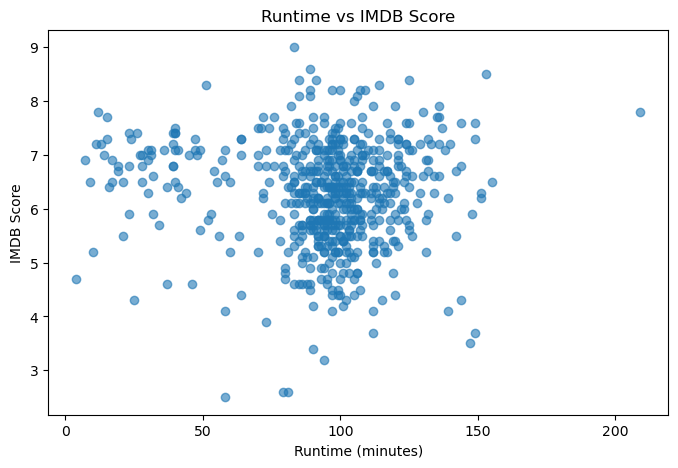

In [34]:
# Runtime vs IMDB Score
plt.figure(figsize=(8,5))
plt.scatter(df["Runtime"], df["IMDB Score"], alpha=0.6)
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Score")
plt.title("Runtime vs IMDB Score")
plt.show()

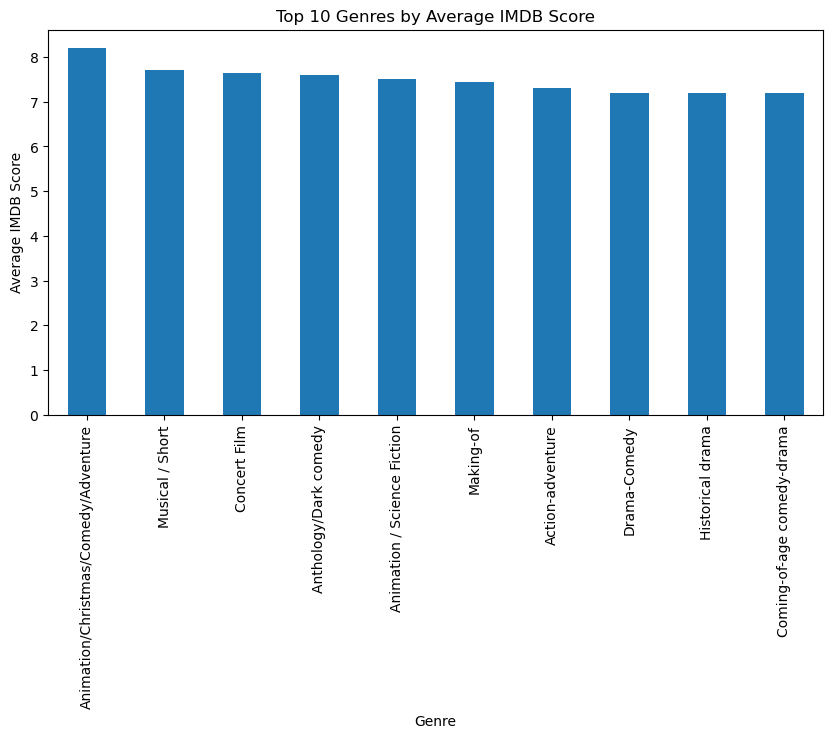

In [35]:
# Average IMDB Score by Genre (Top 10)
df.groupby("Genre")["IMDB Score"].mean().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average IMDB Score")
plt.title("Top 10 Genres by Average IMDB Score")
plt.show()

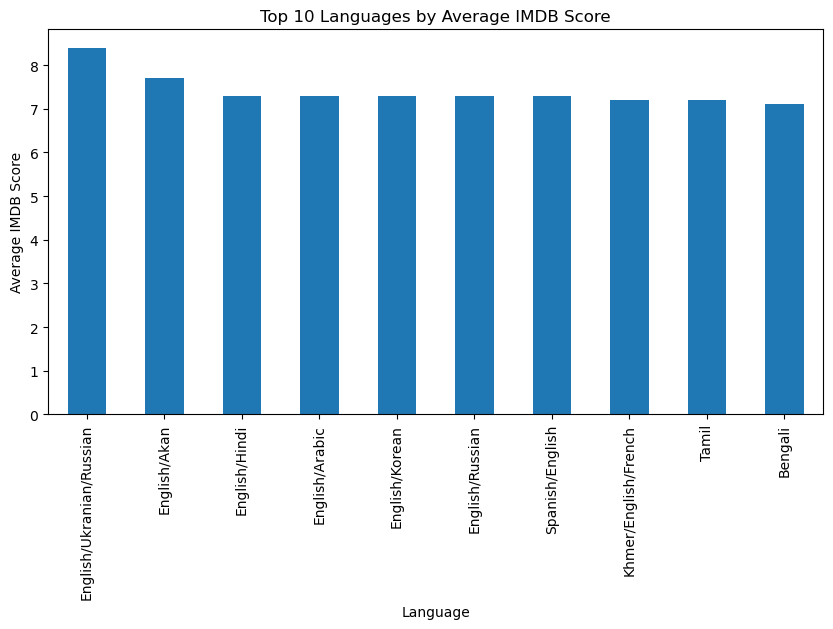

In [36]:
# Average IMDB Score by Language (Top 10)
df.groupby("Language")["IMDB Score"].mean().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average IMDB Score")
plt.title("Top 10 Languages by Average IMDB Score")
plt.show()